# CLT vs PJ

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Cálculos CLT

### Cálculos Mensais

In [33]:
salario_mensal_bruto=[1_903.98, 2_826.66, 3_751.06, 4_664.68, 9_000, 15_000, 25_000, 30_000]


In [34]:
def mostrar_descontos_mensais(funcao):
    """
    Formata saída para mostrar descontos mensais em formato de tabela
    """
    results =  [(f'R$ {salario:,.2f}', f'R$ {funcao(salario):,.2f}', f'{funcao(salario) / salario:.2%}') for salario in salario_mensal_bruto]
    df = pd.DataFrame(results, columns=["Salário","Imposto Descontado","Porcentagem"])
    return df

In [35]:
def imposto_de_renda_mensal(salario_mensal:float) -> float:
    """
    Calcula imposto de renda PF de acordo com faixa do ano de 2019
    https://impostoderenda2019.net.br/tabela-imposto-de-renda-2019/
    
    """
    saldo = salario_mensal
    aliquotas_faixas = {0.275: 4_664.68, 0.225: 3_751.06, 0.15: 2_826.66, 0.075: 1_903.98, 0: 0}
    ir = 0
    desconto_simplificado = 0.20  # 20% de desconto simplificado
    for aliquota, faixa in aliquotas_faixas.items():
        delta = max(saldo - faixa, 0)
        ir += delta * aliquota * (1 - desconto_simplificado)
        saldo = min(saldo, faixa)
    return ir


Para o cálculo do imposto de renda, foi usada a [tabela desse site](https://impostoderenda2019.net.br/tabela-imposto-de-renda-2019/), que está reproduzida abaixo:

| Base de Cálculo | Alíquota |
| --------------- | -------- |
|`De R$1.903,99 até R$2.826,65` | 7,5% |
|`De R$2.826,66 até R$3.751,05` | 15% | 
|`De R$3.751,06 até R$4.664,68` | 22,5% | 
|`Acima de R$4.664,68` | 27,5% |

Em seguida exibimos o salário, quanto foi descontado e o percentual real retido pelo imposto considerando o desconto simplificado.

In [36]:
mostrar_descontos_mensais(imposto_de_renda_mensal)


,Salário,Imposto Descontado,Porcentagem
0,"R$ 1,903.98",R$ 0.00,0.00%
1,"R$ 2,826.66",R$ 55.36,1.96%
2,"R$ 3,751.06",R$ 166.29,4.43%
3,"R$ 4,664.68",R$ 330.74,7.09%
4,"R$ 9,000.00","R$ 1,284.51",14.27%
5,"R$ 15,000.00","R$ 2,604.51",17.36%
6,"R$ 25,000.00","R$ 4,804.51",19.22%
7,"R$ 30,000.00","R$ 5,904.51",19.68%


In [37]:
def fgts_mensal(salario_mensal: float)-> float:
    """
    Calcula fgts a ser pago de imposto pelo empregador em 1 ano. 
    Aliquota de 8% + 40% disso em caso de demissão com justa causa -> 11,2%
    
    
    :param salario_mensal: salário mensal bruto do empregado
    :return: float
    """
    return salario_mensal * 0.112


In [38]:
mostrar_descontos_mensais(fgts_mensal)


,Salário,Imposto Descontado,Porcentagem
0,"R$ 1,903.98",R$ 213.25,11.20%
1,"R$ 2,826.66",R$ 316.59,11.20%
2,"R$ 3,751.06",R$ 420.12,11.20%
3,"R$ 4,664.68",R$ 522.44,11.20%
4,"R$ 9,000.00","R$ 1,008.00",11.20%
5,"R$ 15,000.00","R$ 1,680.00",11.20%
6,"R$ 25,000.00","R$ 2,800.00",11.20%
7,"R$ 30,000.00","R$ 3,360.00",11.20%


In [39]:
def inss_empregado(salario_mensal):
    """
    Calcula inss para 2019
    :param salario_mensal: 
    :return: 
    """
    if salario_mensal < 1_751.81:
        return salario_mensal * 0.08
    elif salario_mensal < 2_919.72:
        return salario_mensal * 0.09
    
    teto = 5_839.45
    return min(salario_mensal, teto) * 0.11


In [40]:

mostrar_descontos_mensais(inss_empregado)

,Salário,Imposto Descontado,Porcentagem
0,"R$ 1,903.98",R$ 171.36,9.00%
1,"R$ 2,826.66",R$ 254.40,9.00%
2,"R$ 3,751.06",R$ 412.62,11.00%
3,"R$ 4,664.68",R$ 513.11,11.00%
4,"R$ 9,000.00",R$ 642.34,7.14%
5,"R$ 15,000.00",R$ 642.34,4.28%
6,"R$ 25,000.00",R$ 642.34,2.57%
7,"R$ 30,000.00",R$ 642.34,2.14%


### Cálculos Anuais

In [41]:
def imposto_de_renda_anual(salario):
    """
    Calcula imposto de renda anual considerando Décimo terceiro e terço de ferias
    :param salario: 
    :return: 
    """
    ir = imposto_de_renda_mensal(salario) * 11
    salario_de_ferias = salario + salario / 3
    ir += imposto_de_renda_mensal(salario_de_ferias - inss_empregado(salario_de_ferias)) / 0.80
    ir += imposto_de_renda_mensal(salario - inss_empregado(salario)) / 0.80  # Tributação exlusiva de décimo terceiro
    return ir


In [42]:
def mostrar_descontos_anuais(funcao):
    salarios = salario_mensal_bruto
    salarios_anuais = [s * 13 + s / 3 for s in salario_mensal_bruto]
    results = [
        (f'R$ {salario:,.2f}', f'R$ {salario_anual:,.2f}', f'R$ {funcao(salario):,.2f}', f'{funcao(salario) / salario_anual:.2%}') for
        salario,  salario_anual in zip(salarios, salarios_anuais)]
    df = pd.DataFrame(results, columns=["Salário Mensal", "Salário Anual", "Imposto Descontado", "Porcentagem"])
    return df

In [43]:
mostrar_descontos_anuais(imposto_de_renda_anual)


,Salário Mensal,Salário Anual,Imposto Descontado,Porcentagem
0,"R$ 1,903.98","R$ 25,386.40",R$ 30.46,0.12%
1,"R$ 2,826.66","R$ 37,688.80",R$ 807.44,2.14%
2,"R$ 3,751.06","R$ 50,014.13","R$ 2,340.55",4.68%
3,"R$ 4,664.68","R$ 62,195.73","R$ 4,600.50",7.40%
4,"R$ 9,000.00","R$ 120,000.00","R$ 17,812.61",14.84%
5,"R$ 15,000.00","R$ 200,000.00","R$ 36,182.61",18.09%
6,"R$ 25,000.00","R$ 333,333.33","R$ 66,799.28",20.04%
7,"R$ 30,000.00","R$ 400,000.00","R$ 82,107.61",20.53%


In [44]:
def inss_anual(salario):
    """
    Calcula valor total decontado do empregado anualmente
    :param salario: 
    :return: 
    """
    ONZE_MESES_MAIS_DECIMO_TERCEIRO = 12
    inss = inss_empregado(salario) * ONZE_MESES_MAIS_DECIMO_TERCEIRO
    salario_ferias = salario + salario / 3
    return inss + inss_empregado(salario_ferias)


In [45]:
mostrar_descontos_anuais(inss_anual)


,Salário Mensal,Salário Anual,Imposto Descontado,Porcentagem
0,"R$ 1,903.98","R$ 25,386.40","R$ 2,284.78",9.00%
1,"R$ 2,826.66","R$ 37,688.80","R$ 3,467.37",9.20%
2,"R$ 3,751.06","R$ 50,014.13","R$ 5,501.55",11.00%
3,"R$ 4,664.68","R$ 62,195.73","R$ 6,799.72",10.93%
4,"R$ 9,000.00","R$ 120,000.00","R$ 8,350.41",6.96%
5,"R$ 15,000.00","R$ 200,000.00","R$ 8,350.41",4.18%
6,"R$ 25,000.00","R$ 333,333.33","R$ 8,350.41",2.51%
7,"R$ 30,000.00","R$ 400,000.00","R$ 8,350.41",2.09%


In [46]:
def impostos_anuais(salario):
    return imposto_de_renda_anual(salario)+inss_empregado(salario)

In [47]:
def resumo_empregado(salario):
    """
    Retorna tupla com (Salario Mensal, Salario Mensal liquido,Salario Anual Liquido, Salario Liquido +fgts,Salario Bruto Anual , Impostos, FGTS, 
    :param funcao: 
    :return: 
    """

    salario_anual_bruto = salario * 13 + salario / 3
    impostos = impostos_anuais(salario)
    fgts_anual = fgts_mensal(salario)
    fgts_anual = fgts_anual * 13 + fgts_anual / 3
    salario_mensal_liquido = salario - imposto_de_renda_mensal(salario) - fgts_mensal(salario) - inss_empregado(salario)
    salario_anual_menos_impostos = salario_anual_bruto - impostos
    return salario, salario_mensal_liquido, salario_anual_menos_impostos, salario_anual_menos_impostos + fgts_anual, salario_anual_bruto, impostos, fgts_anual,



In [48]:
result = [map(lambda v: f'{v:<15,.2f}', resumo_empregado(salario)) for salario in salario_mensal_bruto]
df = pd.DataFrame(result, columns=["Salário Mensal", "Salário Mensal Líquido","Salário Anual Líquido","Salário Liquido +FGTS", "Salário Bruto Anual", "Imposto Descontado", "FGTS"])
display(df)


,Salário Mensal,Salário Mensal Líquido,Salário Anual Líquido,Salário Liquido +FGTS,Salário Bruto Anual,Imposto Descontado,FGTS
0,"1,903.98","1,519.38","25,184.58","28,027.85","25,386.40",201.82,"2,843.28"
1,"2,826.66","2,200.31","36,626.96","40,848.11","37,688.80","1,061.84","4,221.15"
2,"3,751.06","2,752.04","47,260.97","52,862.55","50,014.13","2,753.17","5,601.58"
3,"4,664.68","3,298.38","57,082.12","64,048.04","62,195.73","5,113.61","6,965.92"
4,"9,000.00","6,065.15","101,545.05","114,985.05","120,000.00","18,454.95","13,440.00"
5,"15,000.00","10,073.15","163,175.05","185,575.05","200,000.00","36,824.95","22,400.00"
6,"25,000.00","16,753.15","265,891.72","303,225.05","333,333.33","67,441.62","37,333.33"
7,"30,000.00","20,093.15","317,250.05","362,050.05","400,000.00","82,749.95","44,800.00"


In [49]:
faturamento_bruto = [(s+fgts_mensal(s)) * (13 + 1 / 3) for s in salario_mensal_bruto]



In [50]:
display(pd.DataFrame([f'{v:,.2f}' for v in faturamento_bruto], columns=["Faturamento Bruto"]))

,Faturamento Bruto
0,"28,229.68"
1,"41,909.95"
2,"55,615.72"
3,"69,161.66"
4,"133,440.00"
5,"222,400.00"
6,"370,666.67"
7,"444,800.00"


# PJ SIMPLES ANEXO III

In [51]:
def custos_simples_anexo_iii(faturamento_anual, contador=89, prolabore=1_100) -> float:
    """
    Calcula custos de impostos para empresa simples de anexo III
    DAS, Prólabore e Contador
    
    Aliquotas 2019: https://www.contabilizei.com.br/contabilidade-online/anexo-3-simples-nacional/
    :param faturamento_anual: 
    :param contador: 
    :param prolabore: 
    :return: 
    """
    saldo = faturamento_anual
    aliquotas_faixas = {0.33: 3_600_000, 0.21: 1_800_000, 0.16: 720_000, 0.135: 360_000, 0.112: 180_000, 0.06: 0}
    imposto = 0
    for aliquota, faixa in aliquotas_faixas.items():
        delta = max(saldo - faixa, 0)
        imposto += delta * aliquota
        saldo = min(saldo, faixa)
    inss = prolabore * 0.11
    return imposto + 12 * (contador + inss)


Para o cálculo de impostos PJ foi utilizada a tabela [desse site](https://www.contabilizei.com.br/contabilidade-online/anexo-3-simples-nacional/) reproduzida abaixo

| Faixa   | Alíquota|  Valor a Deduzir  | Receita Bruta em 12 Meses         |
| ------- | ------- | ----------------- | --------------------------------- |
|1a Faixa |	6,00%   |       -            |   Até 180.000,00                  | 
|2a Faixa |	11,20%  |   9.360,00	    |   De 180.000,01 a 360.000,00      |
|3a Faixa |	13,50%  |   17.640,00	    |   De 360.000,01 a 720.000,00      |
|4a Faixa |	16,00%  |   35.640,00	    |   De 720.000,01 a 1.800.000,00    |
|5a Faixa |	21,00%  |   125.640,00	    |   De 1.800.000,01 a 3.600.000,00  | 
|6a Faixa |	33,00%  |   648.000,00	    |   De 3.600.000,01 a 4.800.000,00  |

In [52]:
def resumo_pj(faturamento):
    custo_anual = custos_simples_anexo_iii(faturamento)
    return faturamento / 12, (faturamento - custo_anual) / 12, faturamento - custo_anual, faturamento 



In [53]:
results = [map(lambda v: f'{v:<15,.2f}', resumo_pj(faturamento)) for faturamento in faturamento_bruto]
display(pd.DataFrame(results, columns=["Faturamento Mensal", "Lucro Mensal", "Lucro Anual", "Faturamento Anual"]))

,Faturamento Mensal,Lucro Mensal,Lucro Anual,Faturamento Anual
0,"2,352.47","2,001.32","24,015.90","28,229.68"
1,"3,492.50","3,072.95","36,875.35","41,909.95"
2,"4,634.64","4,146.56","49,758.77","55,615.72"
3,"5,763.47","5,207.66","62,491.96","69,161.66"
4,"11,120.00","10,242.80","122,913.60","133,440.00"
5,"18,533.33","17,027.60","204,331.20","222,400.00"
6,"30,888.89","27,978.89","335,746.67","370,666.67"
7,"37,066.67","33,322.67","399,872.00","444,800.00"


## Resultado

In [54]:
data = []
for salario, faturamento in zip(salario_mensal_bruto, faturamento_bruto):
    result = []
    result.append(f'{salario:,.2f}')
    clt = resumo_empregado(salario)[2]
    result.append(f'R$ {clt :<15,.2f}')
    pj = resumo_pj(faturamento)[2]
    result.append(f'R$ {pj :<15,.2f}')
    result.append(f'R${pj - clt :<15,.2f}')
    data.append(result)
df = pd.DataFrame(data, columns=["Salário Mensal", "CLT", "PJ", "DIFF"])
display(df)


,Salário Mensal,CLT,PJ,DIFF
0,"1,903.98","R$ 25,184.58","R$ 24,015.90","R$-1,168.68"
1,"2,826.66","R$ 36,626.96","R$ 36,875.35",R$248.39
2,"3,751.06","R$ 47,260.97","R$ 49,758.77","R$2,497.81"
3,"4,664.68","R$ 57,082.12","R$ 62,491.96","R$5,409.83"
4,"9,000.00","R$ 101,545.05","R$ 122,913.60","R$21,368.55"
5,"15,000.00","R$ 163,175.05","R$ 204,331.20","R$41,156.15"
6,"25,000.00","R$ 265,891.72","R$ 335,746.67","R$69,854.95"
7,"30,000.00","R$ 317,250.05","R$ 399,872.00","R$82,621.95"


In [55]:
data = []
index = []
for salario, faturamento in zip(salario_mensal_bruto, faturamento_bruto):
    result = []
    index.append(f'R$ {salario:,.2f}')
    clt = resumo_empregado(salario)[2]
    result.append(clt)
    pj = resumo_pj(faturamento)[2]
    result.append(pj)
    result.append(pj - clt)
    data.append(result)
df = pd.DataFrame(data, columns=[ "CLT", "PJ", "DIFF"], index=index)

Text(0.5, 0, 'Salário Mensal')

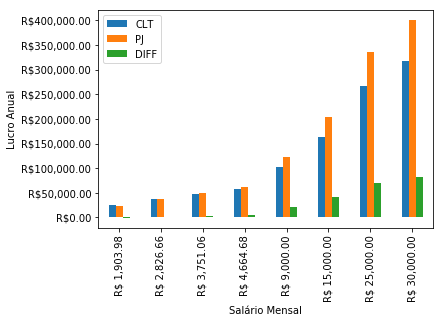

In [56]:
ax = df.plot.bar(figsize=(9.));
vals = ax.get_yticks();
ax.set_yticklabels([f'R${x:,.2f}' for x in vals]);
ax.set_ylabel("Lucro Anual")
ax.set_xlabel("Salário Mensal")


